In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pickle

mpl.rcParams.update({'font.size': 14, 'axes.labelsize': 'medium', 'axes.titlesize': 'medium', 'legend.fontsize': 12})

In [2]:
def fold_analysis(run_name):
    dfs_fold = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name}/summary_results.csv')
    print('MEAN RECOVERY', dfs_fold.recovery.mean(), dfs_fold.dtermen_recovery.mean())
    print('MEDIAN RECOVERY', dfs_fold.recovery.median(), dfs_fold.dtermen_recovery.median())
    fig, ax = plt.subplots(figsize=(6,4.5))
    sns.scatterplot(data = dfs_fold, x='dtermen_recovery', y='recovery', ax=ax)
    ax.plot(np.arange(0, 100), np.arange(0, 100), c='red', ls='-')
    ax.set_xlim([0, dfs_fold.recovery.max()+1])
    ax.set_ylim([0, dfs_fold.recovery.max()+1])
    ax.set_xlabel('Percent Recovery from dTERMen')
    ax.set_ylabel(f'Percent Recovery from TERMinator {run_name}')
    ax.set_title(f'Ingraham split')
        
    fig, ax = plt.subplots(figsize=(6,4.5))
    with open(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name}/training_curves.pk', 'rb') as f:
        training_curve = pickle.load(f)
    train, test = zip(*training_curve)
    ax.plot(np.arange(len(train)), train)
    ax.plot(np.arange(len(test)), test)
    ax.set_ylim([min(min(train), min(test)), max(max(train), max(test))])
    ax.set_title(f'Ingraham split')

In [3]:
def fold_analysis_(run_name):
    dfs_fold = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name}/summary_results_complexity_filter.csv')
    print('MEAN RECOVERY', dfs_fold.recovery.mean(), dfs_fold.dtermen_recovery.mean())
    print('MEDIAN RECOVERY', dfs_fold.recovery.median(), dfs_fold.dtermen_recovery.median())
    fig, ax = plt.subplots(figsize=(6,4.5))
    sns.scatterplot(data = dfs_fold, x='dtermen_recovery', y='recovery', ax=ax)
    ax.plot(np.arange(0, 100), np.arange(0, 100), c='red', ls='-')
    ax.set_xlim([0, dfs_fold.recovery.max()+1])
    ax.set_ylim([0, dfs_fold.recovery.max()+1])
    ax.set_xlabel('Percent Recovery from dTERMen')
    ax.set_ylabel(f'Percent Recovery from TERMinator {run_name}')
    ax.set_title(f'Ingraham split')
        
    fig, ax = plt.subplots(figsize=(6,4.5))
    with open(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name}/training_curves.pk', 'rb') as f:
        training_curve = pickle.load(f)
    train, test = zip(*training_curve)
    ax.plot(np.arange(len(train)), train)
    ax.plot(np.arange(len(test)), test)
    ax.set_ylim([min(min(train), min(test)), max(max(train), max(test))])
    ax.set_title(f'Ingraham split')

In [4]:
def perplexity(run_name):
    with open(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name}/perplexity.log') as fp:
        fp.readline()
        p = float(fp.readline().strip())
        print(f"Perplexity {p}")

# Full Model

MEAN RECOVERY 39.199810285714285 23.89610711607143
MEDIAN RECOVERY 41.570449999999994 24.32575


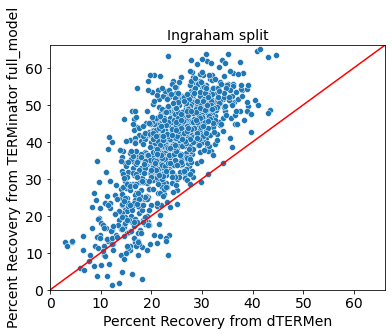

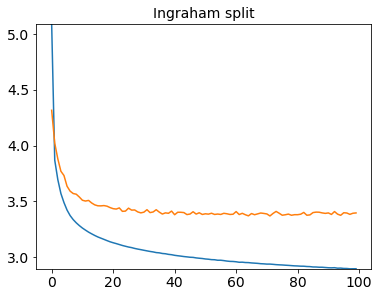

In [19]:
fold_analysis("full_model")

In [20]:
perplexity("full_model")

Perplexity 5.2627339363098145


# Ablate net1

MEAN RECOVERY 38.03982468571429 23.89610711607143
MEDIAN RECOVERY 40.64215 24.32575


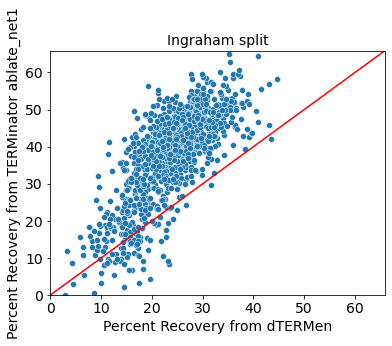

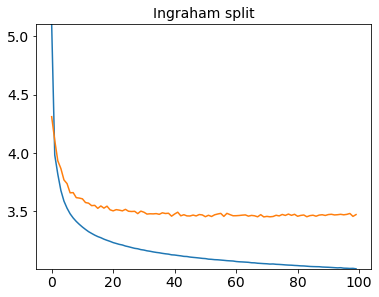

In [21]:
fold_analysis("ablate_net1")

In [22]:
perplexity("ablate_net1")

Perplexity 5.431153297424316


# Delete net1

MEAN RECOVERY 37.77712311607143 23.89610711607143
MEDIAN RECOVERY 40.4494 24.32575


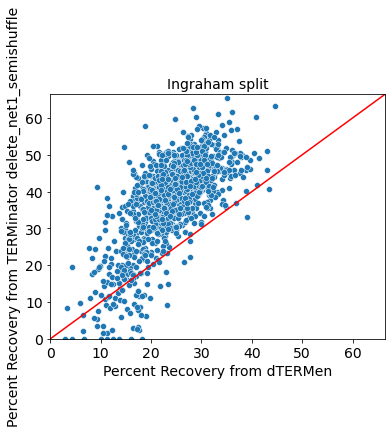

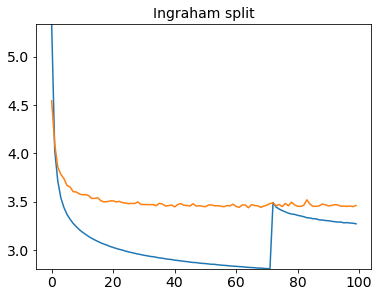

In [23]:
fold_analysis("delete_net1_semishuffle")

In [24]:
perplexity("delete_net1_semishuffle")

Perplexity 5.4165120124816895


MEAN RECOVERY 36.9094631875 23.89610711607143
MEDIAN RECOVERY 39.27755 24.32575


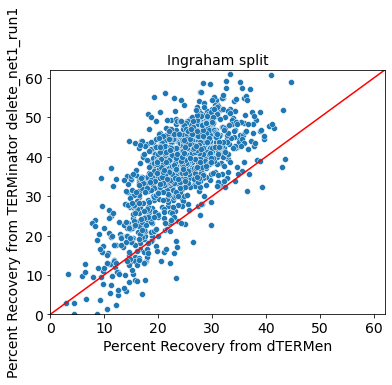

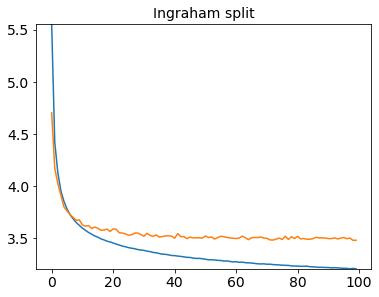

In [37]:
fold_analysis("delete_net1_run1")

MEAN RECOVERY 37.23643784821429 23.89610711607143
MEDIAN RECOVERY 39.71595 24.32575


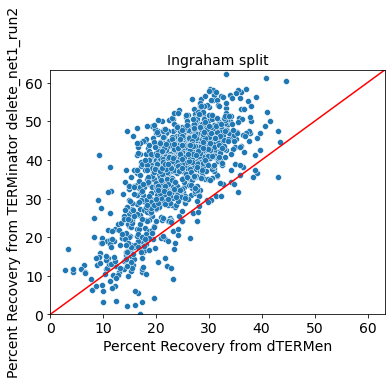

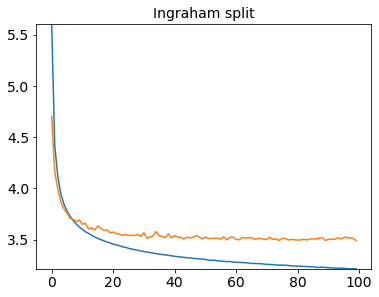

In [38]:
fold_analysis("delete_net1_run2")

# Ablate coords

MEAN RECOVERY 34.27613304285715 23.89610711607143
MEDIAN RECOVERY 35.9122 24.32575


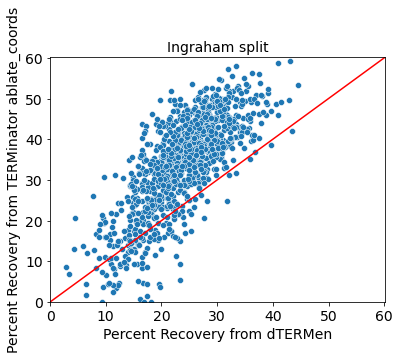

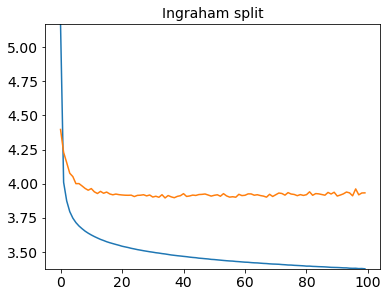

In [25]:
fold_analysis("ablate_coords")

In [26]:
perplexity("ablate_coords")

Perplexity 6.853372573852539


# Ablate s2s

MEAN RECOVERY 24.246016668750002 23.89610711607143
MEDIAN RECOVERY 28.5714 24.32575


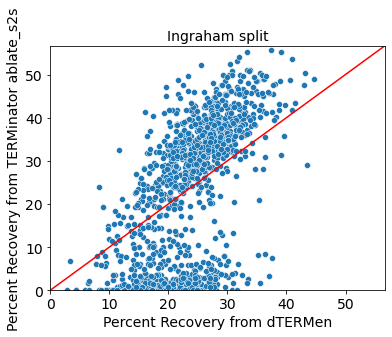

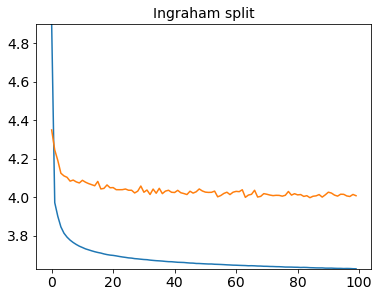

In [27]:
fold_analysis("ablate_s2s")

In [28]:
perplexity("ablate_s2s")

Perplexity 7.196211814880371


# Ablate singleton features

MEAN RECOVERY 39.98004025892857 23.89610711607143
MEDIAN RECOVERY 42.2764 24.32575


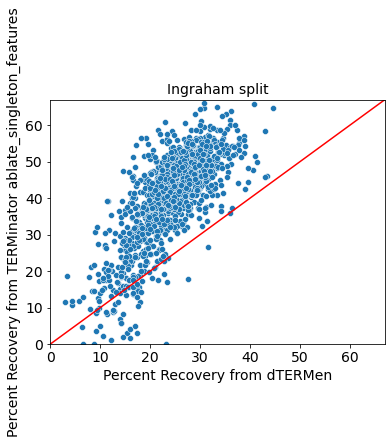

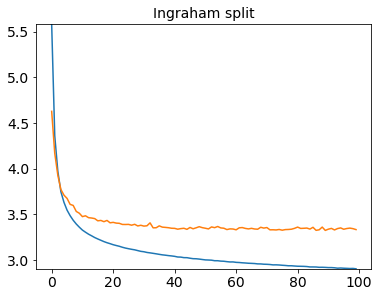

In [34]:
fold_analysis("ablate_singleton_features")

In [28]:
perplexity("ablate_singletone_features")

Perplexity 7.196211814880371


MEAN RECOVERY 39.87895664285714 23.89610711607143
MEDIAN RECOVERY 42.555800000000005 24.32575


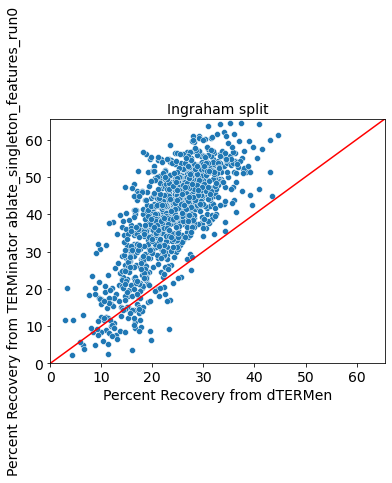

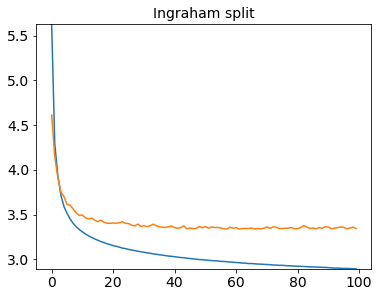

In [36]:
fold_analysis("ablate_singleton_features_run0")

MEAN RECOVERY 39.60819417857143 23.89610711607143
MEDIAN RECOVERY 42.14105 24.32575


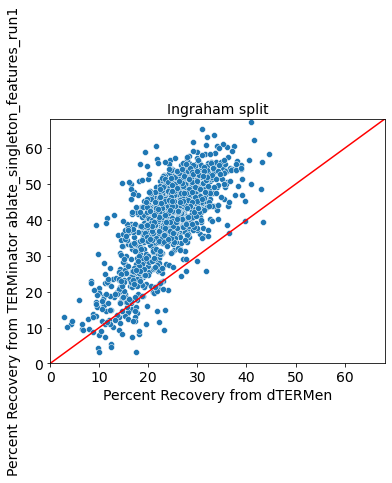

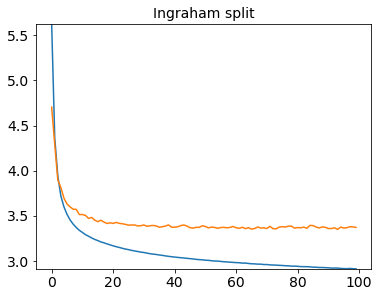

In [34]:
fold_analysis("ablate_singleton_features_run1")

MEAN RECOVERY 39.937831187499995 23.89610711607143
MEDIAN RECOVERY 42.2451 24.32575


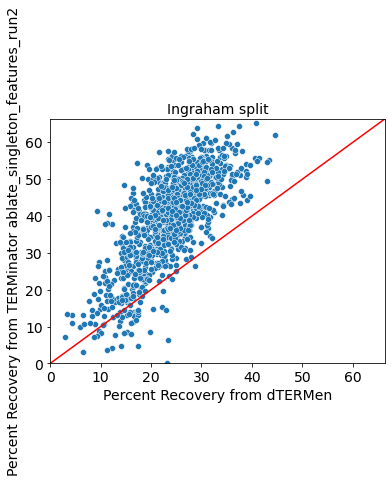

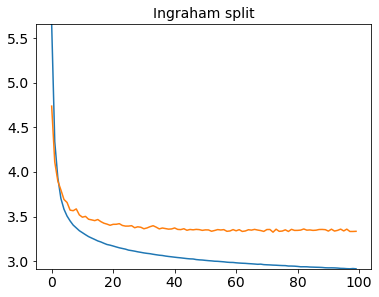

In [35]:
fold_analysis("ablate_singleton_features_run2")

# Ablate pairwise features

MEAN RECOVERY 38.93551546023235 23.897506586237714
MEDIAN RECOVERY 41.6168 24.3421


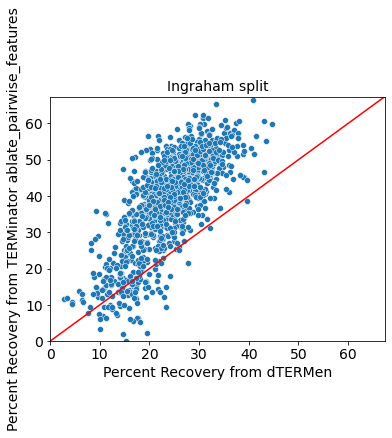

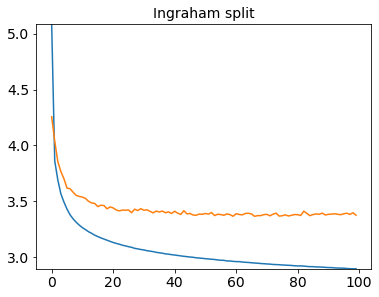

In [35]:
fold_analysis("ablate_pairwise_features")

In [28]:
perplexity("ablate_s2s")

Perplexity 7.196211814880371


# Ablate term mpnn

MEAN RECOVERY 39.11373516964285 23.89610711607143
MEDIAN RECOVERY 41.2268 24.32575


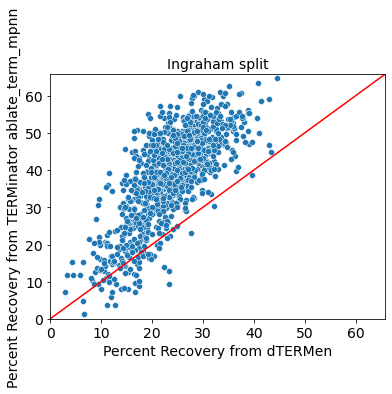

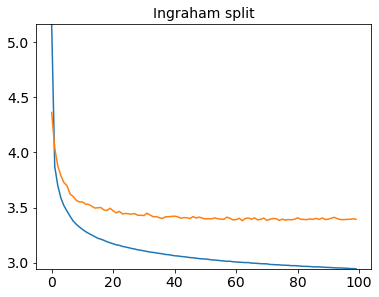

In [36]:
fold_analysis("ablate_term_mpnn")

In [28]:
perplexity("ablate_s2s")

Perplexity 7.196211814880371


# GVP Chimera

MEAN RECOVERY 36.0629583381295 23.87250878597122
MEDIAN RECOVERY 41.198949999999996 24.197200000000002


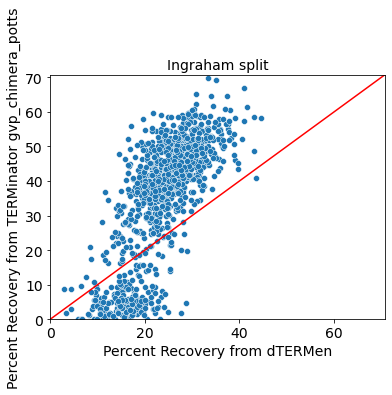

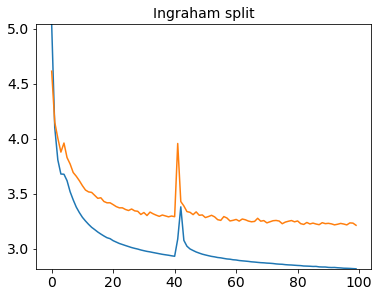

In [29]:
fold_analysis("gvp_chimera_potts")

MEAN RECOVERY 37.43889967857143 23.89610711607143
MEDIAN RECOVERY 40.4101 24.32575


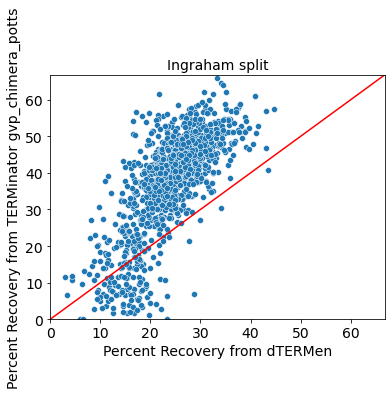

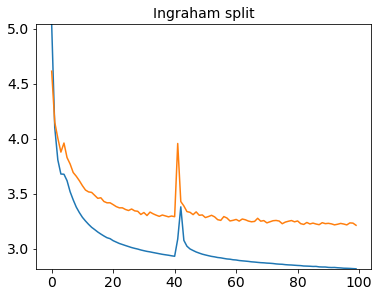

In [35]:
# fold analysis after the complexity filter but only one sequences below the line and <30 percent recovery
fold_analysis("gvp_chimera_potts")

     Unnamed: 0     ids                                     pred_sequences  \
603         603  4MT8_B  MGGGGGGGGAMGGGGGGGGGGGGGGGGGGFGAGGGGMAAGLEKVVR...   

                                        real_sequences  \
603  ILEESMHARDQLMEQNFALDKARQEAEMAVHARNDFLAVMNHEMRT...   

                                dtermen_pred_sequences  recovery  \
603  EEEEEEESEKEEEERRKEEEEAKKEVEEKVKAELEEVLKELKEILE...      12.5   

     dtermen_recovery  
603            15.625  


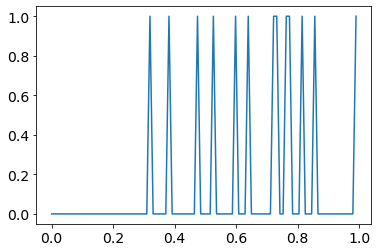

In [26]:
def vis_recovery(run_name):
    df_fold = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name}/summary_results.csv')
    sample = df_fold.sample()
    print(sample)
    recovery = np.array([c for c in sample.pred_sequences.iloc[0]]) == np.array([c for c in sample.real_sequences.iloc[0]])
    idx = np.arange(len(recovery)) / len(recovery)
    plt.plot(idx, recovery)
    plt.show()
    
vis_recovery("gvp_chimera_potts")

# Complexity penalty test
## Pre-complexity penalty

In [8]:
dfs_fold_gvp_potts_no_pen = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_gvp_potts/summary_results.csv')
for row in dfs_fold_gvp_potts_no_pen[dfs_fold_gvp_potts_no_pen.recovery <= dfs_fold_gvp_potts_no_pen.dtermen_recovery].iterrows():
    print(row)

(6, Unnamed: 0                                                                6
ids                                                                  1GYZ_A
pred_sequences            GGGGGGGGGGGGGGGGGGGGGAGGGLGGGGGGGGGGGGGGGGGGGG...
real_sequences            WIARINAAVRAYGLNYSTFINGLKKAGIELDRKILADMAVRDPQAF...
dtermen_pred_sequences    GEQLLIEAYSDIGSDGKELAKSAELIGVDNKEGGLAKVAVENPKEA...
recovery                                                            3.33333
dtermen_recovery                                                   18.33330
Name: 6, dtype: object)
(22, Unnamed: 0                                                               22
ids                                                                  1BJX_A
pred_sequences            MIKKIKDIKDIIKIIEEKDIIIIIIIDKIDDKKAKEIIEAAKEIKD...
real_sequences            AATTLPDGAAAESLVESSEVAVIGFFKDVESDSAKQFLQAAEAIDD...
dtermen_pred_sequences    PLPEIEDLSLAEELLEKTDIAVLLFLKYPDGKEAEAAKEALEKYTE...
recovery                                               

(568, Unnamed: 0                                                              568
ids                                                                  2ODM_A
pred_sequences            KKKKKKEIEKIKKEAEKIKKKIEELLKKKKKKIDKKLKKDIEKIKK...
real_sequences            ATMKNAALKQLTKDADEILHLIKVQLDNLCPLYEEVLDTQMFGLQK...
dtermen_pred_sequences    EEEEEEAKKKAEELVEEVRKLIDDAKKKDGPRLEEKLRALLRAVKE...
recovery                                                            18.4211
dtermen_recovery                                                    23.6842
Name: 568, dtype: object)
(569, Unnamed: 0                                                              569
ids                                                                  3ZBH_A
pred_sequences            VTPADLLAAAAAAAAAAAAAAAALAAAAAAAAAFAGVVSGPAGAAA...
real_sequences            LTPEELRGVARQYNVESSNVTELIARLDQMSHTLQGIWEGASSEAF...
dtermen_pred_sequences    ETPEKAREEAEKAAKLAEDVRKLAEKLKEELERLKEKLTGPELAEV...
recovery                                          

MEAN RECOVERY 35.367714660714284 23.89610711607143
MEDIAN RECOVERY 38.82755 24.32575


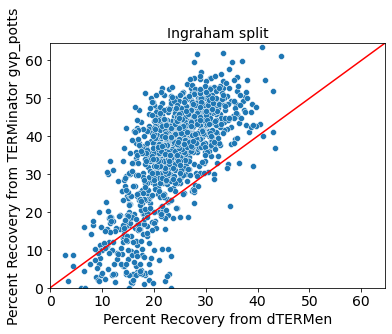

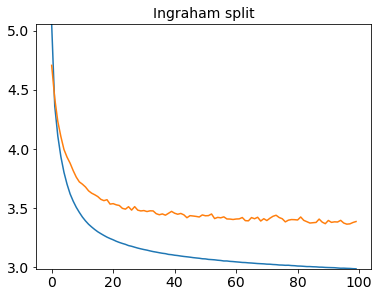

In [9]:
fold_analysis("gvp_potts")

## Post-complexity penalty

MEAN RECOVERY 35.88352022321429 23.89610711607143
MEDIAN RECOVERY 38.7176 24.32575


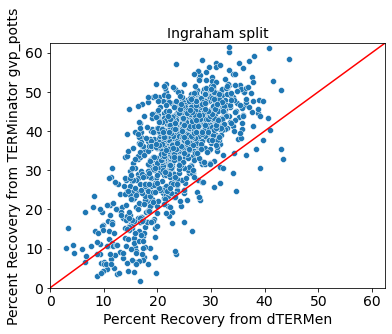

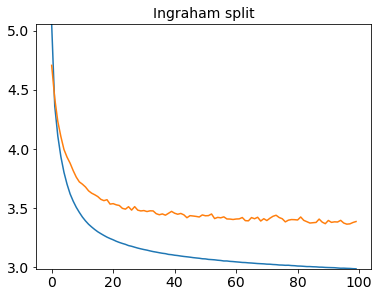

In [5]:
fold_analysis("gvp_potts")

In [25]:
dfs_fold_gvp_potts_no_pen = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_gvp_potts/summary_results.csv')
for row in dfs_fold_gvp_potts_no_pen[dfs_fold_gvp_potts_no_pen.recovery <= dfs_fold_gvp_potts_no_pen.dtermen_recovery].sort_values("recovery").iterrows():
    if row[1].recovery > 15:
        break
    row = row[1]
    print(row.ids)
    print(row.pred_sequences, "predicted")
    print(row.real_sequences, "actual")
    print(row.dtermen_pred_sequences, "dTERMen")
    print(f"{row.recovery}% recovery")
    print()

1PD3_A
GPLGGGGLGGAGGGGGGGGGGAAGAGVGAGFAGAGALGGGGGGGGGGAGGLAGG  predicted
GKWREQLGQKFEEIRWLIEEVRHRLKITENSFEQITFMQALQLLLEVEQEIRTF  actual
GPEKSKREEELKERIKPRLEELKKEVKSPESPELKKAAEEIEKLEEELKELETT  dTERMen
1.85185% recovery

1QBZ_A
GGPGGGGGAGGGGGGGGGAGGGGALGGVAGIKSLIENIIKIIEKIKKEIETYKKIKKKKIKIIKNIFNIFDIIATEIIDGVGGGGGAGGGGGGAGGGGGGGG  predicted
QSRTLLAGIVQQQQQLLDVVKRQQELLRLTVWGTKNLQTRVTAIEKYLKDQAQLNAWGTPKWNNETWQEWERKVDFLEENITALLEEAQIQQEKNMYELQKL  actual
DDEEERKQEAEKKREEAERKREELKEEREKIREEAKEAEEERKREKREKEERAKKEEEGEEEKDEEERKEAEKIEREVKRRQEELRKEEEEAKREEEEKGKD  dTERMen
2.94118% recovery

1RSO_B
IIIIDIIIIIIIIIIIKIIDIINKINIIIIIKIINIINIIEIIIIIIIEIIISIII  predicted
GLLAAERAVSQVLDSLEEIHALTDSSEKDLDFLHSVFQDQHLHTLLDLYDKINTKS  actual
EEEEATLALEKAAEEAEEVLRETGEGPEELARLLEEILAEEAEKEAEEAAREALIK  dTERMen
3.57143% recovery

3NR7_A
GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGAGGGGGGGGGGGGGGGGGAAGGGGGGGAGGGAGFADAGLQPGALASAPSSG  predicted
SEALKILNNIRTLRAQARESTLETLEEMLEKLEVVVNERREEESAAAAEVEERTRKLQQYREMLIADGIDPNELLNSMAAA  actual
EAE

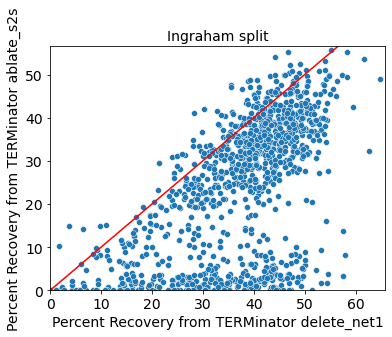

In [11]:
def cross_fold_analysis(run_name1, run_name2):
    dfs_fold1 = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name1}/summary_results.csv')
    dfs_fold2 = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name2}/summary_results.csv')
    fig, ax = plt.subplots(figsize=(6,4.5))
    sns.scatterplot(x=dfs_fold1.recovery, y=dfs_fold2.recovery, ax=ax)
    ax.plot(np.arange(0, 100), np.arange(0, 100), c='red', ls='-')
    ax.set_xlim([0, dfs_fold1.recovery.max()+1])
    ax.set_ylim([0, dfs_fold2.recovery.max()+1])
    ax.set_xlabel(f'Percent Recovery from TERMinator {run_name1}')
    ax.set_ylabel(f'Percent Recovery from TERMinator {run_name2}')
    ax.set_title(f'Ingraham split')
    
cross_fold_analysis("delete_net1", "ablate_s2s")

      Unnamed: 0     ids                                     pred_sequences  \
0              0  1FW3_A  LVPGSVVALATETFPAGPTYLIKVEISKLPKEPIKHLPFAEKASNK...   
1              1  2G5X_A  RPALTVDDDAAAYRAFLEELREEFGKGHPKVCNIPVTRLDDKDKFV...   
2              2  4D70_A  GEKEKKLYDEYLKKFNYNEEEKKKLEKEIKEGDPIALIYIPAINLD...   
3              3  3N8B_A  MKGIIKKIYIPTDTDIDYEIIIKKDEKGNEYLEIIAKVKNKDGSIS...   
4              4  1CJX_B  KPDPLGLDGFDHIALSAPTPGVLEPVLEKLGFRRVARHKRYDIEVW...   
...          ...     ...                                                ...   
1115        1115  1XQA_A  HHGHHHISLPVADVAAARRFLERYFGLRESGRDGDRHARLLDEDGF...   
1116        1116  2PSB_A  GARCPLTGEECEEHLLHTKPIAVVVDGRPEAFPPKGLNEADIVVVF...   
1117        1117  1VP7_A  AAPLPTDEAPAAAALAALAAALAAGTLPADAAAAAAARGAALAAVV...   
1118        1118  3LH4_A  MKIEKEGGYEELSDSDDPRYRELAHFAVSTYSATQPGRDYYDTVVA...   
1119        1119  3FZ5_A  MKNPIKFYYHPASGKAYFAAEEVEKIAKELGCEVEWIPGINFKDKK...   

                                         real_seque

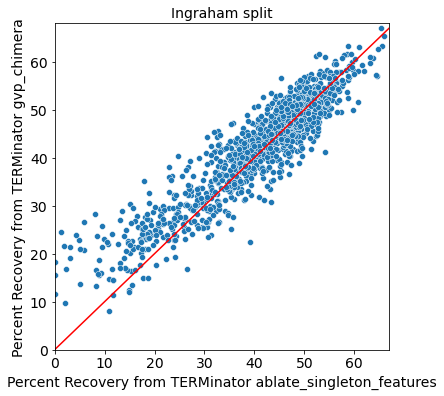

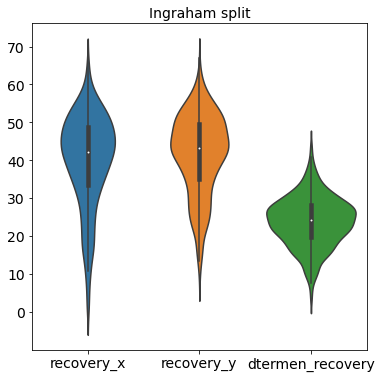

In [30]:
def blah(run_name1):
    dfs_fold1 = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name1}/summary_results_complexity_filter.csv')
    with open("/scratch/users/alexjli/tmp/recovery.pk", 'rb') as fp:
        gvp_chimera = pickle.load(fp)
        gvp_chimera['ids'] = gvp_chimera['pdbs']
        gvp_chimera['recovery'] = [float(r) * 100 for r in gvp_chimera['recovery']]
        del gvp_chimera['pdbs']
    dfs_fold2 = pd.DataFrame(gvp_chimera)
    
    df = pd.merge(dfs_fold1, dfs_fold2, on=['ids'])
    print(df)
    fig, ax = plt.subplots(figsize=(6,6))
    sns.scatterplot(data=df, x="recovery_x", y="recovery_y", ax=ax)
    ax.plot(np.arange(0, 100), np.arange(0, 100), c='red', ls='-')
    ax.set_xlim([0, dfs_fold1.recovery.max()+1])
    ax.set_ylim([0, dfs_fold2.recovery.max()+1])
    ax.set_xlabel(f'Percent Recovery from TERMinator {run_name1}')
    ax.set_ylabel(f'Percent Recovery from TERMinator gvp_chimera')
    ax.set_title(f'Ingraham split')
    fig, ax = plt.subplots(figsize=(6,6))
    sns.violinplot(data=df[['recovery_x', 'recovery_y', 'dtermen_recovery']], ax=ax)
    ax.set_title(f'Ingraham split')
    
blah("ablate_singleton_features")

      Unnamed: 0     ids                                     pred_sequences  \
0              0  1FW3_A  DVPGSIVERLLEDYPFFLDYDIDAEASELPVETVAAEGWAASLTRR...   
1              1  2G5X_A  MPSLVVHKDAASYREFLVQLREEFGRGQPRVCDVPVTLAEEKDEFV...   
2              2  4D70_A  MGDFDRIKRELLAQFKLSLQEQLRLLEEIKKGDPIALLRIEKIGIE...   
3              3  3N8B_A  SPGRVYHARLPTAGPVELDLDVDRDEEGRLHLRLTARVRLPGGAVA...   
4              4  1CJX_B  LPNPLGLAGVDFLEFASSTPGTLLPAFERLGFRRIARHKTKNNFVL...   
...          ...     ...                                                ...   
1115        1115  1XQA_A  HHGHHEVVLPVEDVAKAREFFEKYFGFKTAGTVGDDFAVLLDENGF...   
1116        1116  2PSB_A  GPLCPLTGEACREELLEVRPVAALIDMRPEALPPKGIDKADIIIAA...   
1117        1117  1VP7_A  GPPLPAGAAAAAAALAAVAAALAAGTLPAAQAAQAAARAAALAAVL...   
1118        1118  3LH4_A  HHHHHHGGYRARSPTDDPRYLELAHFAVATVSAKLPGKKYYDTVVE...   
1119        1119  3FZ5_A  MTGPIRFYFELTSGEAVFASFTIPAVAAQLGVTVEVLPASKLGSDE...   

                                         real_seque

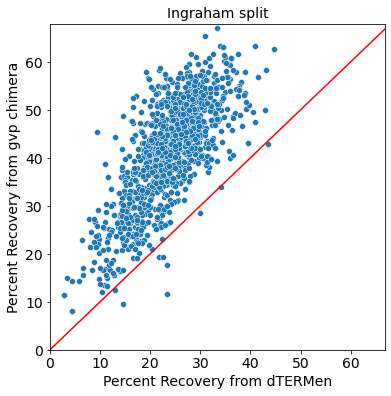

In [7]:
def blah2(run_name1):
    dfs_fold1 = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name1}/summary_results.csv')
    with open("/scratch/users/alexjli/tmp/recovery.pk", 'rb') as fp:
        gvp_chimera = pickle.load(fp)
        gvp_chimera['ids'] = gvp_chimera['pdbs']
        gvp_chimera['recovery'] = [float(r) * 100 for r in gvp_chimera['recovery']]
        del gvp_chimera['pdbs']
    dfs_fold2 = pd.DataFrame(gvp_chimera)
    
    df = pd.merge(dfs_fold1, dfs_fold2, on=['ids'])
    print(df)
    fig, ax = plt.subplots(figsize=(6,6))
    sns.scatterplot(data=df, x="dtermen_recovery", y="recovery_y", ax=ax)
    ax.plot(np.arange(0, 100), np.arange(0, 100), c='red', ls='-')
    ax.set_xlim([0, dfs_fold1.recovery.max()+1])
    ax.set_ylim([0, dfs_fold2.recovery.max()+1])
    ax.set_xlabel(f'Percent Recovery from dTERMen')
    ax.set_ylabel(f'Percent Recovery from gvp chimera')
    ax.set_title(f'Ingraham split')
    
blah2("gvp_chimera_potts")

41.61252524703741 43.13129335641861
      Unnamed: 0     ids                                     pred_sequences  \
0              0  1FW3_A  DVPGSIVERLLEDYPFFLDYDIDAEASELPVETVAAEGWAASLTRR...   
1              1  2G5X_A  MPSLVVHKDAASYREFLVQLREEFGRGQPRVCDVPVTLAEEKDEFV...   
2              2  4D70_A  MGDFDRIKRELLAQFKLSLQEQLRLLEEIKKGDPIALLRIEKIGIE...   
3              3  3N8B_A  SPGRVYHARLPTAGPVELDLDVDRDEEGRLHLRLTARVRLPGGAVA...   
4              4  1CJX_B  LPNPLGLAGVDFLEFASSTPGTLLPAFERLGFRRIARHKTKNNFVL...   
...          ...     ...                                                ...   
1115        1115  1XQA_A  HHGHHEVVLPVEDVAKAREFFEKYFGFKTAGTVGDDFAVLLDENGF...   
1116        1116  2PSB_A  GPLCPLTGEACREELLEVRPVAALIDMRPEALPPKGIDKADIIIAA...   
1117        1117  1VP7_A  GPPLPAGAAAAAAALAAVAAALAAGTLPAAQAAQAAARAAALAAVL...   
1118        1118  3LH4_A  HHHHHHGGYRARSPTDDPRYLELAHFAVATVSAKLPGKKYYDTVVE...   
1119        1119  3FZ5_A  MTGPIRFYFELTSGEAVFASFTIPAVAAQLGVTVEVLPASKLGSDE...   

               

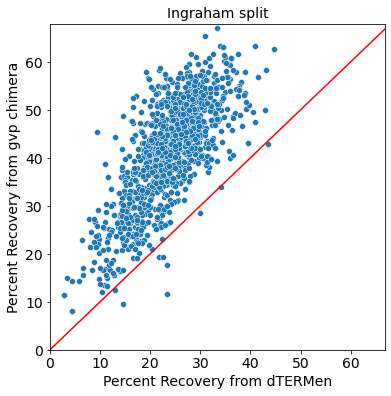

In [40]:
def blah3(run_name1):
    dfs_fold1 = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name1}/summary_results.csv')
    with open("/scratch/users/alexjli/tmp/recovery.pk", 'rb') as fp:
        gvp_chimera = pickle.load(fp)
        gvp_chimera['ids'] = gvp_chimera['pdbs']
        gvp_chimera['recovery'] = [float(r) * 100 for r in gvp_chimera['recovery']]
        del gvp_chimera['pdbs']
    dfs_fold2 = pd.DataFrame(gvp_chimera)
    print(dfs_fold2.recovery.mean(), dfs_fold2.recovery.median())
    
    df = pd.merge(dfs_fold1, dfs_fold2, on=['ids'])
    print(df)
    fig, ax = plt.subplots(figsize=(6,6))
    sns.scatterplot(data=df, x="dtermen_recovery", y="recovery_y", ax=ax)
    ax.plot(np.arange(0, 100), np.arange(0, 100), c='red', ls='-')
    ax.set_xlim([0, dfs_fold1.recovery.max()+1])
    ax.set_ylim([0, dfs_fold2.recovery.max()+1])
    ax.set_xlabel(f'Percent Recovery from dTERMen')
    ax.set_ylabel(f'Percent Recovery from gvp chimera')
    ax.set_title(f'Ingraham split')
    
blah3("gvp_chimera_potts")

## NLPL loss fn

MEAN RECOVERY 37.13452391964286 23.89610711607143
MEDIAN RECOVERY 39.538 24.32575


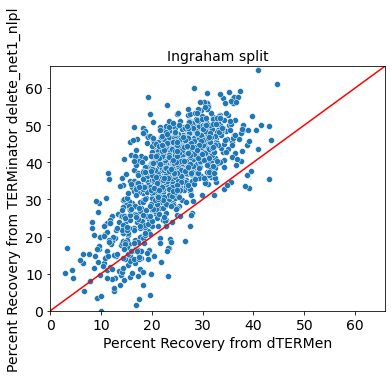

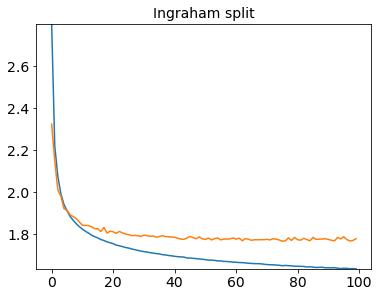

In [42]:
fold_analysis("delete_net1_nlpl")

MEAN RECOVERY 32.377600929464286 23.89610711607143
MEDIAN RECOVERY 36.05605 24.32575


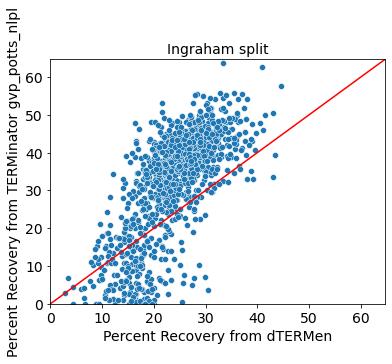

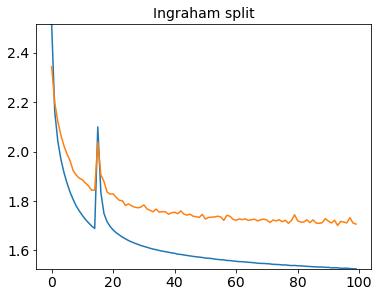

In [41]:
fold_analysis("gvp_potts_nlpl")